# Capstone Project: Travel Insurance Prediction 

## Background

Travel insurance is a specific insurance policy designed to provide coverage for various expenses and potential losses that can occur while traveling. It serves as valuable protection for individuals traveling either within their own country or internationally. Travel insurance typically includes essential features such as reimbursement for trip cancellation, coverage for emergency medical expenses, and compensation for lost or stolen luggage.


- In Kenya this service is offered by firms such as Old Mutual, Standard Chartered, Jubilee, ICEA Lion Group among others.

Importing the necessary libraries for the project

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import streamlit as st

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


Loading the Old Client Dataset

In [128]:
Clients= pd.read_csv("Travel Company Old Clients.csv",sep=';')
Clients

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
677,27,Private Sector/Self Employed,No,450000,7,0,No,No,0
678,25,Private Sector/Self Employed,Yes,1700000,4,0,Yes,No,1
679,26,Government Sector,Yes,500000,5,0,No,No,0
680,29,Private Sector/Self Employed,Yes,1100000,4,1,No,Yes,1


Defining the target variable

In [129]:
y_target=Clients['TravelInsurance']

In [130]:
categoricals = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
numerical = ['Age', 'AnnualIncome', 'FamilyMembers']

# Exploratory Data Analysis

Grouping the data 

In [131]:
categoricals = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer','ChronicDiseases', 'EverTravelledAbroad', 'TravelInsurance']
numerical = ['Age', 'AnnualIncome', 'FamilyMembers']

To check for missingness

In [132]:
Clients.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Both the predictor and response variables have no missing entries(values)

To drop duplicates if any as duplicate features can bias the fitted model and lead to overfitting.

In [133]:
Clients=Clients.drop_duplicates()
Clients

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
674,27,Government Sector,Yes,850000,2,0,No,No,0
676,29,Private Sector/Self Employed,Yes,1200000,7,1,No,No,0
677,27,Private Sector/Self Employed,No,450000,7,0,No,No,0
680,29,Private Sector/Self Employed,Yes,1100000,4,1,No,Yes,1


Splitting the data into features and target variable for further EDA

In [134]:
y = Clients['TravelInsurance']
x = Clients.drop('TravelInsurance', axis = 1)
Clients_total = Clients

In [135]:
x

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No
...,...,...,...,...,...,...,...,...
674,27,Government Sector,Yes,850000,2,0,No,No
676,29,Private Sector/Self Employed,Yes,1200000,7,1,No,No
677,27,Private Sector/Self Employed,No,450000,7,0,No,No
680,29,Private Sector/Self Employed,Yes,1100000,4,1,No,Yes


## Starting with the numerical features.

In [136]:
def plots(Clients, x, y, axes, i):
    sns.histplot(data=Clients, x=x, kde=True, color='green', ax=axes[i][0])
    sns.histplot(data=Clients, x=x, hue=y, kde=True, ax=axes[i][1], palette='Greys')
    group = Clients.groupby(y)
    sns.barplot(x=group[x].mean().index,
                y=group[x].mean(), ax=axes[i][2])
    
    for container in axes[i][2].containers:
        axes[i][2].bar_label(container, size=10, color='black')
        
    axes[i][3].pie(Clients[y].value_counts(),
                   labels=Clients[y].value_counts().index,
                   autopct='%0.2f%%')

In [137]:
def plot_group(Clients, x, y):
    fig, axes = plt.subplots(nrows=len(y), ncols=4, figsize=(20, 20))
    for i in range(len(y)):
        plots(Clients, x, y[i], axes, i)
    plt.suptitle("Barplots and histograms of {} grouped by categorical features".format(x),size=15)
    plt.tight_layout()
    plt.show()

Plotting bars and histograms for each numerical feature against the categorical features to show distribution.

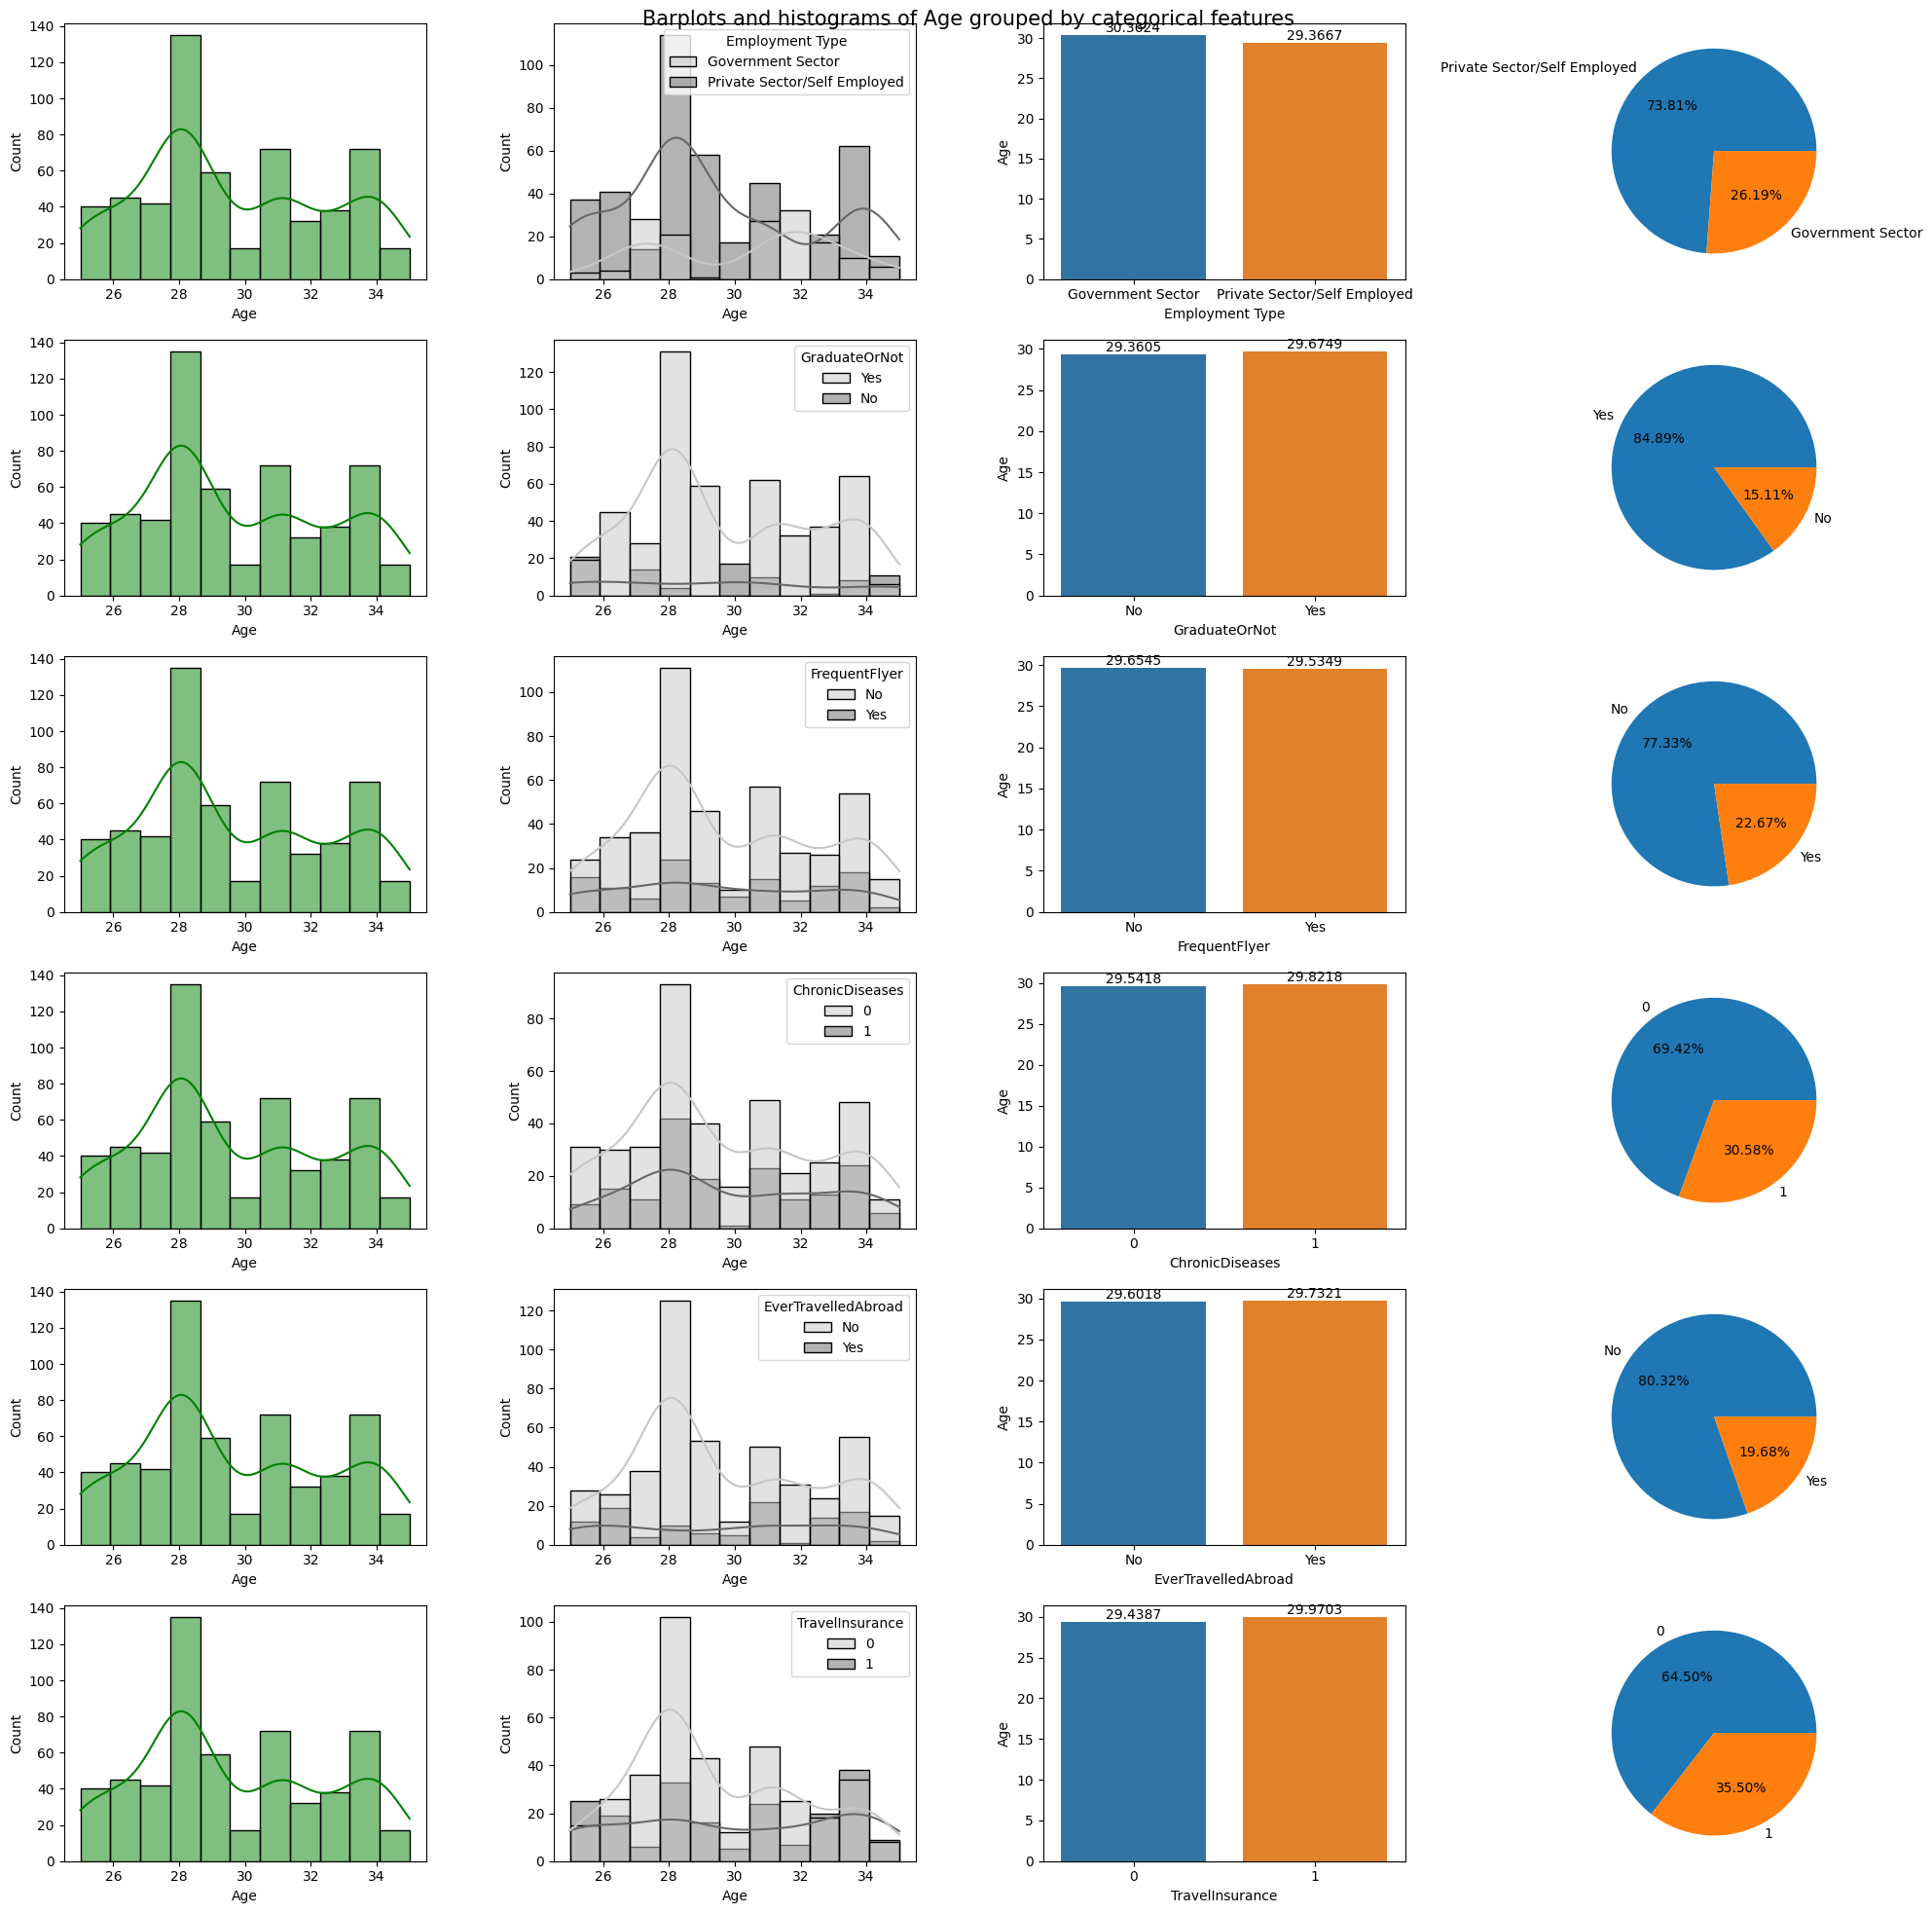

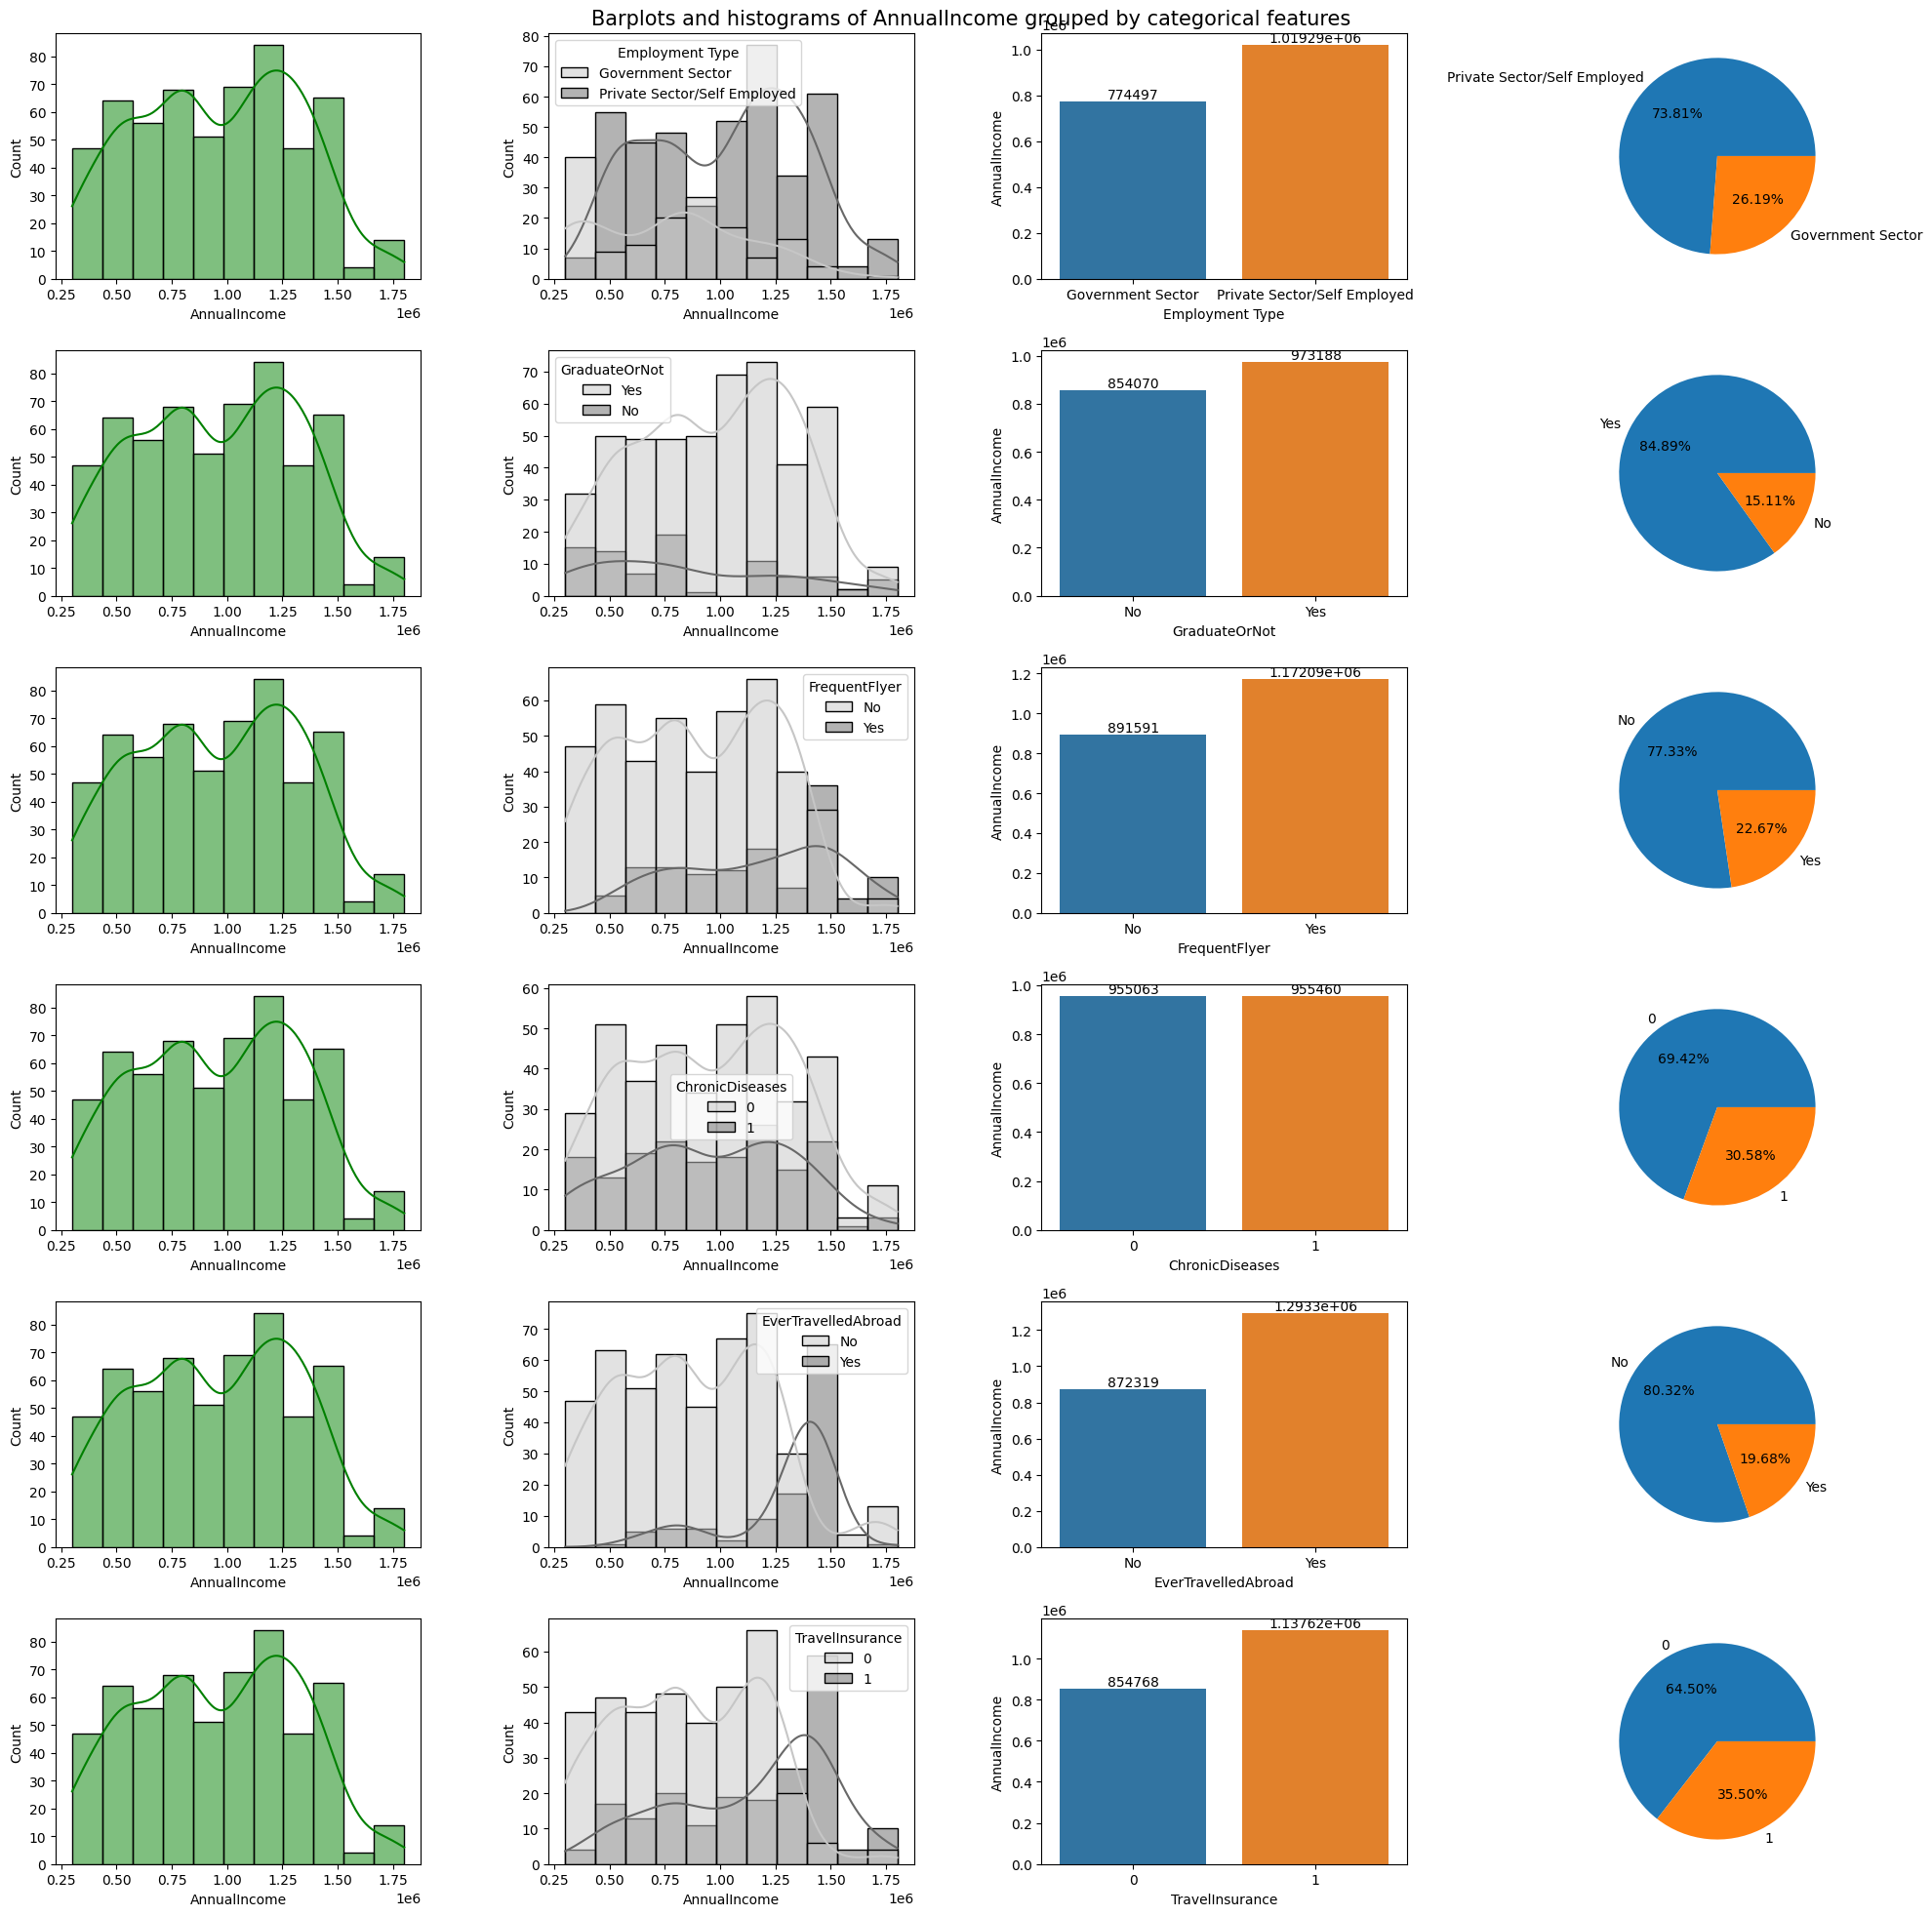

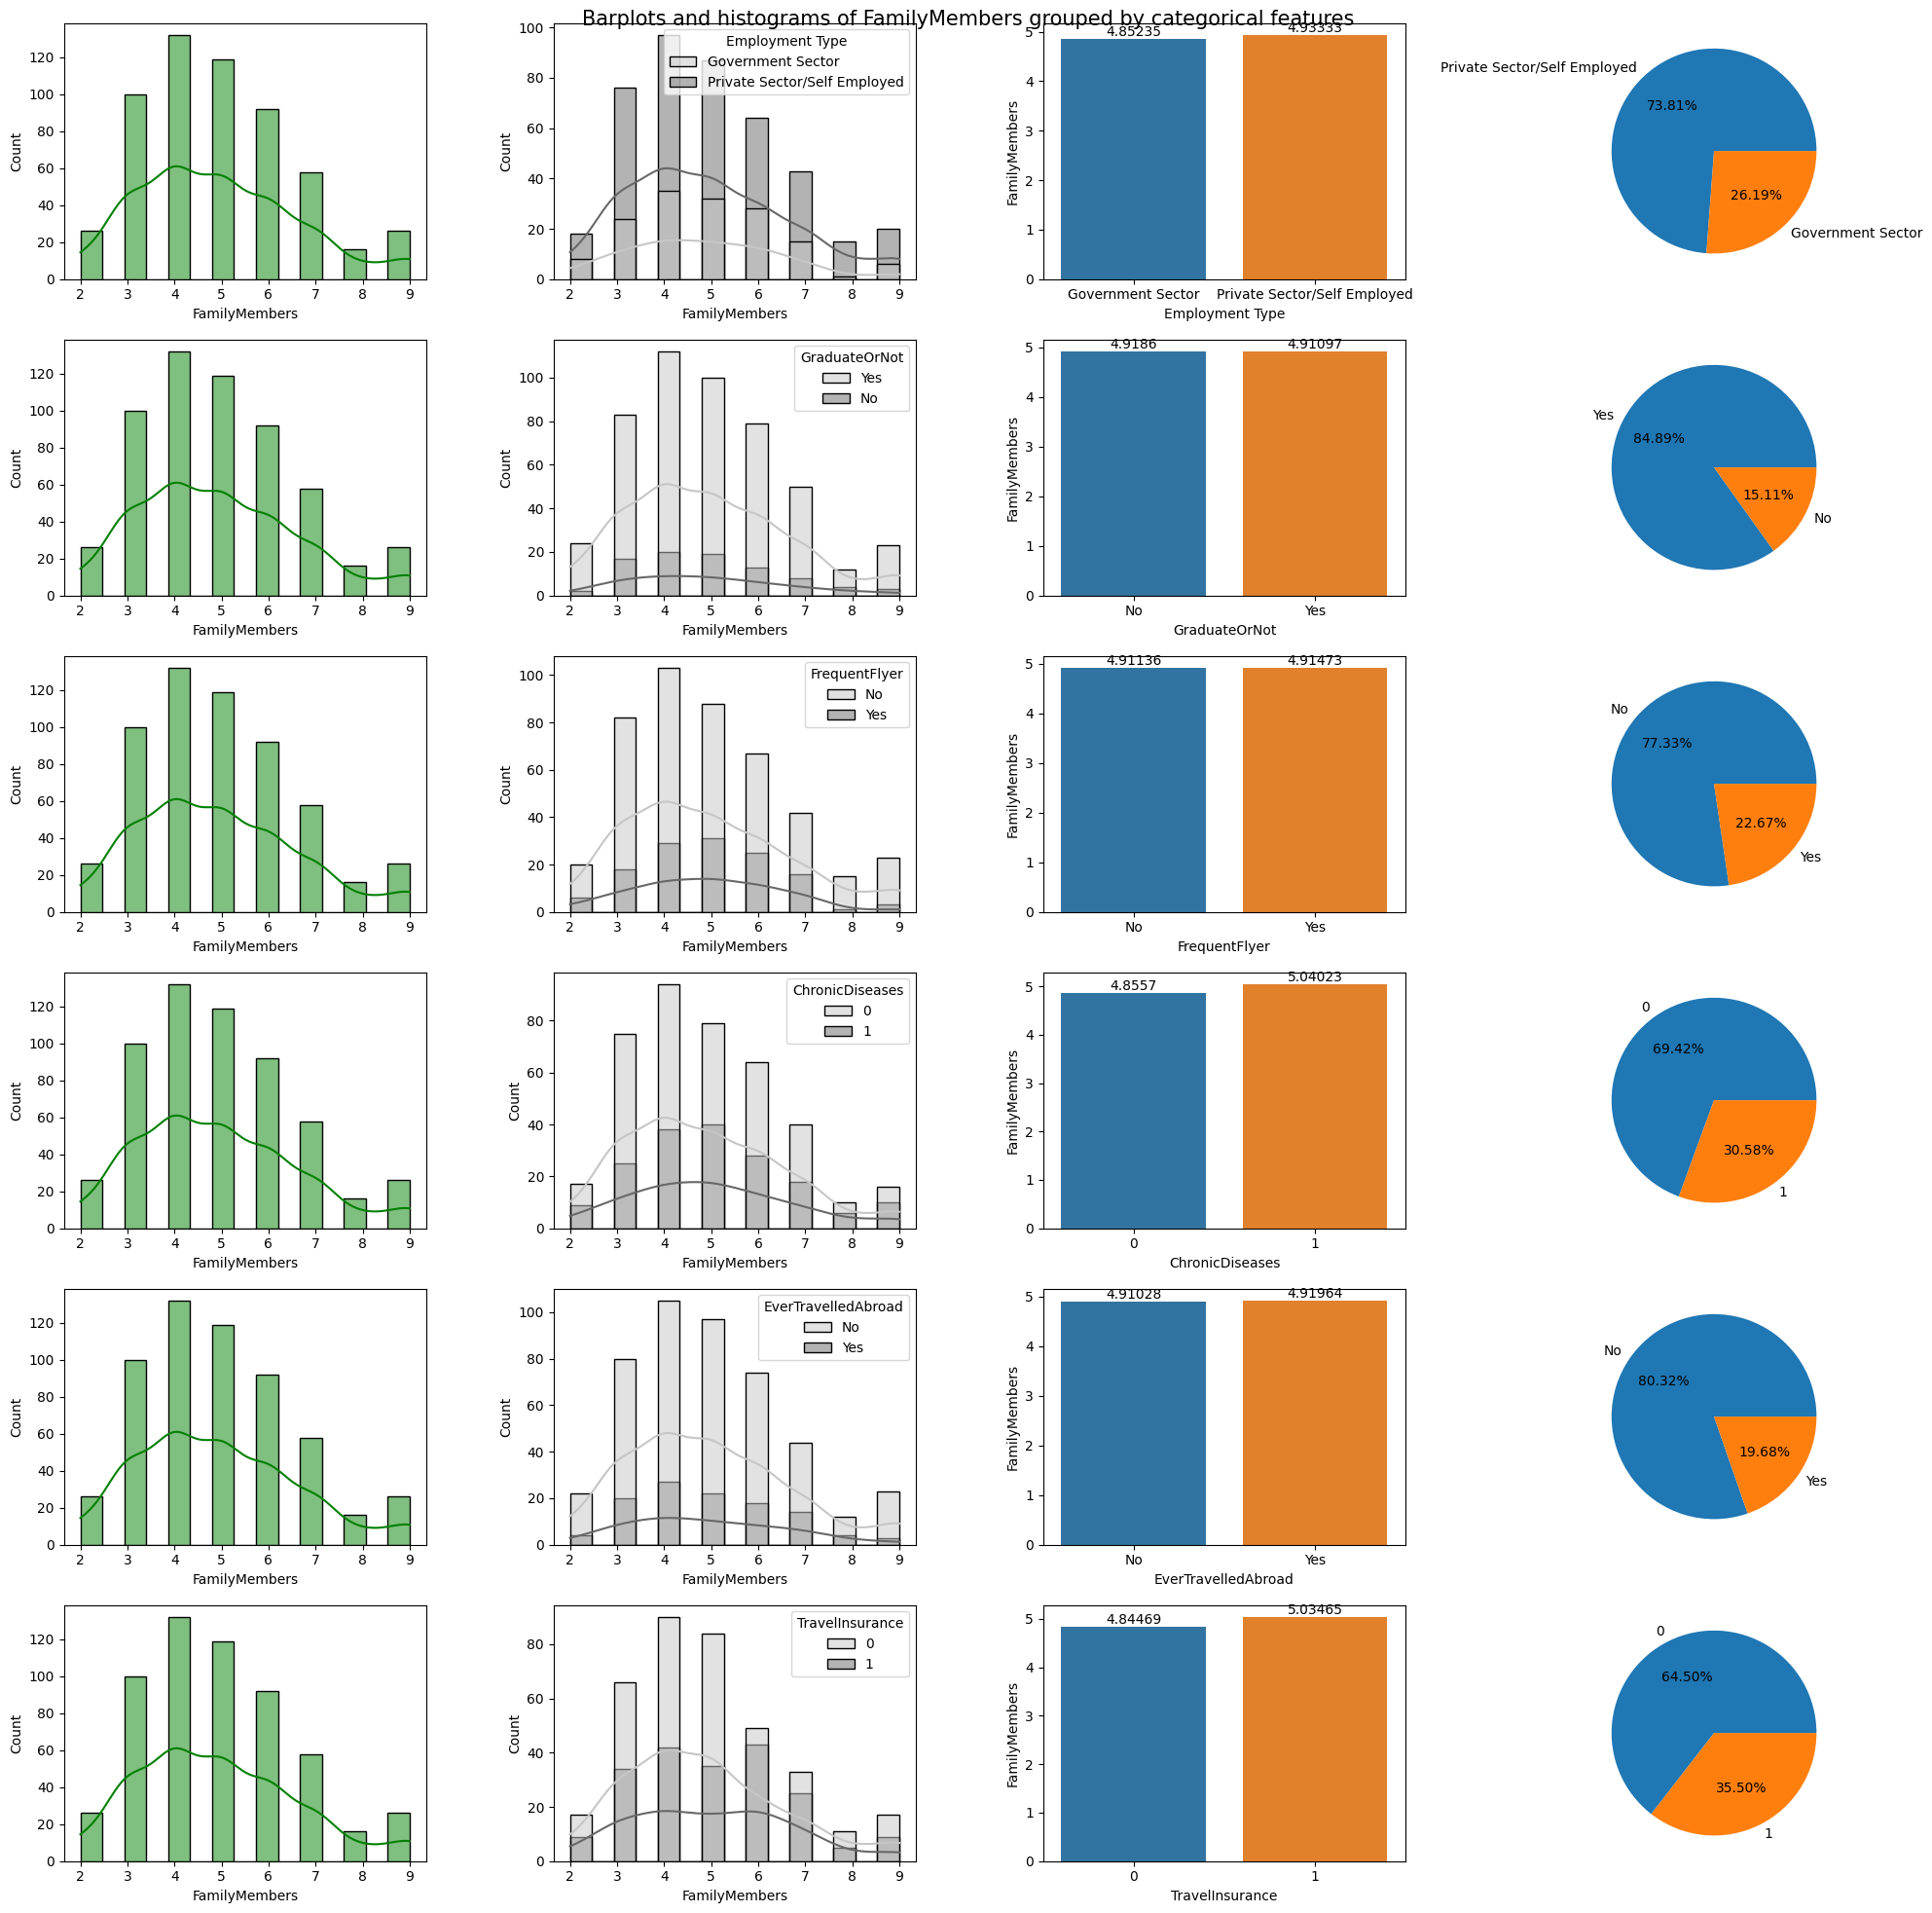

In [138]:
for i in numerical:
    plot_group(Clients, i, categoricals)

Insights:
- Majority(73.81%) of the 'travellers'are either self employed or in the private sector while 26.19% are employed by the government

#### Summary statistics for each numerical features

In [139]:
Clients.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,569.000000,5.690000e+02,569.000000,569.000000,569.000000
mean,29.627417,9.551845e+05,4.912127,0.305800,0.355009
std,2.887873,3.637326e+05,1.702115,0.461151,0.478937
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.500000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.500000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Using scatterplots to:
-Visualize the relationship between the numerical features.
-Identify patterns in the data while detecting outliers.
-Visualize the relationship between the input features and the target variable.

In [140]:
sns.pairplot(Clients,vars=['Age', 'AnnualIncome','FamilyMembers'], hue='TravelInsurance')

- Converting the categorial features into binary

Function to convert employment type into binary

In [ ]:
def convert_employmenttype_to_binary(employmenttype):
    if employmenttype == "Government Sector":
        return 1
    else:
        return 0

Converting employment type feature into binary.

In [ ]:
x['Employment Type'] = x['Employment Type'].apply(convert_employmenttype_to_binary)

Function to convert the other features into binary

In [ ]:
def convert_yesno_to_binary(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return x

Converting the other yes/no features into binary

In [ ]:
x['GraduateOrNot'] = x['GraduateOrNot'].apply(convert_yesno_to_binary)
x['FrequentFlyer'] = x['FrequentFlyer'].apply(convert_yesno_to_binary)
x['EverTravelledAbroad'] = x['EverTravelledAbroad'].apply(convert_yesno_to_binary)
x['ChronicDiseases'] = x['ChronicDiseases'].apply(convert_yesno_to_binary)

x

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0
...,...,...,...,...,...,...,...,...
674,27,1,1,850000,2,0,0,0
676,29,0,1,1200000,7,1,0,0
677,27,0,0,450000,7,0,0,0
680,29,0,1,1100000,4,1,0,1


Converting the target variable into binary

In [ ]:
y = y.apply(convert_yesno_to_binary)
y

0      0
1      0
2      1
3      0
4      0
      ..
674    0
676    0
677    0
680    1
681    0
Name: TravelInsurance, Length: 569, dtype: int64

- #### Plotting boxplots to show the range distribution across the different predictor variables

Text(0.5, 1.0, 'Box plot  showing the range of predictor features')

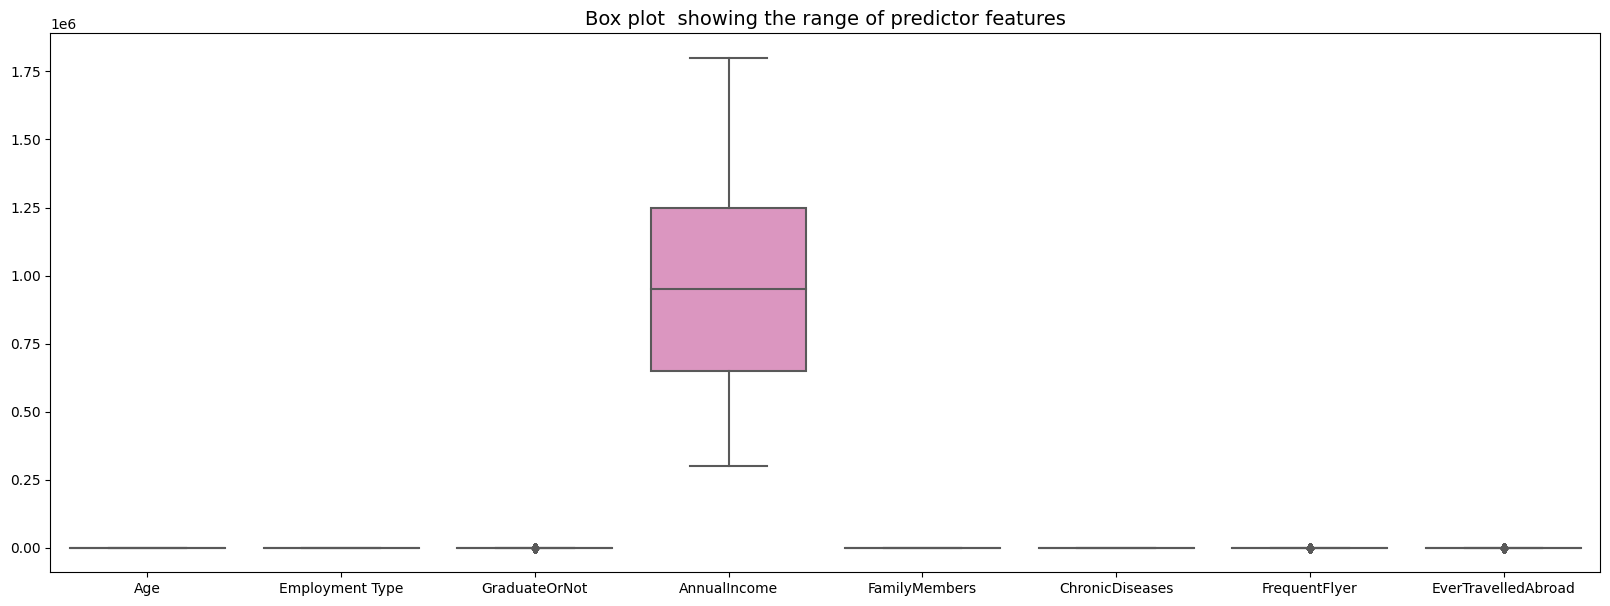

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set2")
plt.title("Box plot  showing the range of predictor features", size=14)

Clearly annual income has a larger range compared to the othere features.


We can also plot the ranges individually to visualize every feature.

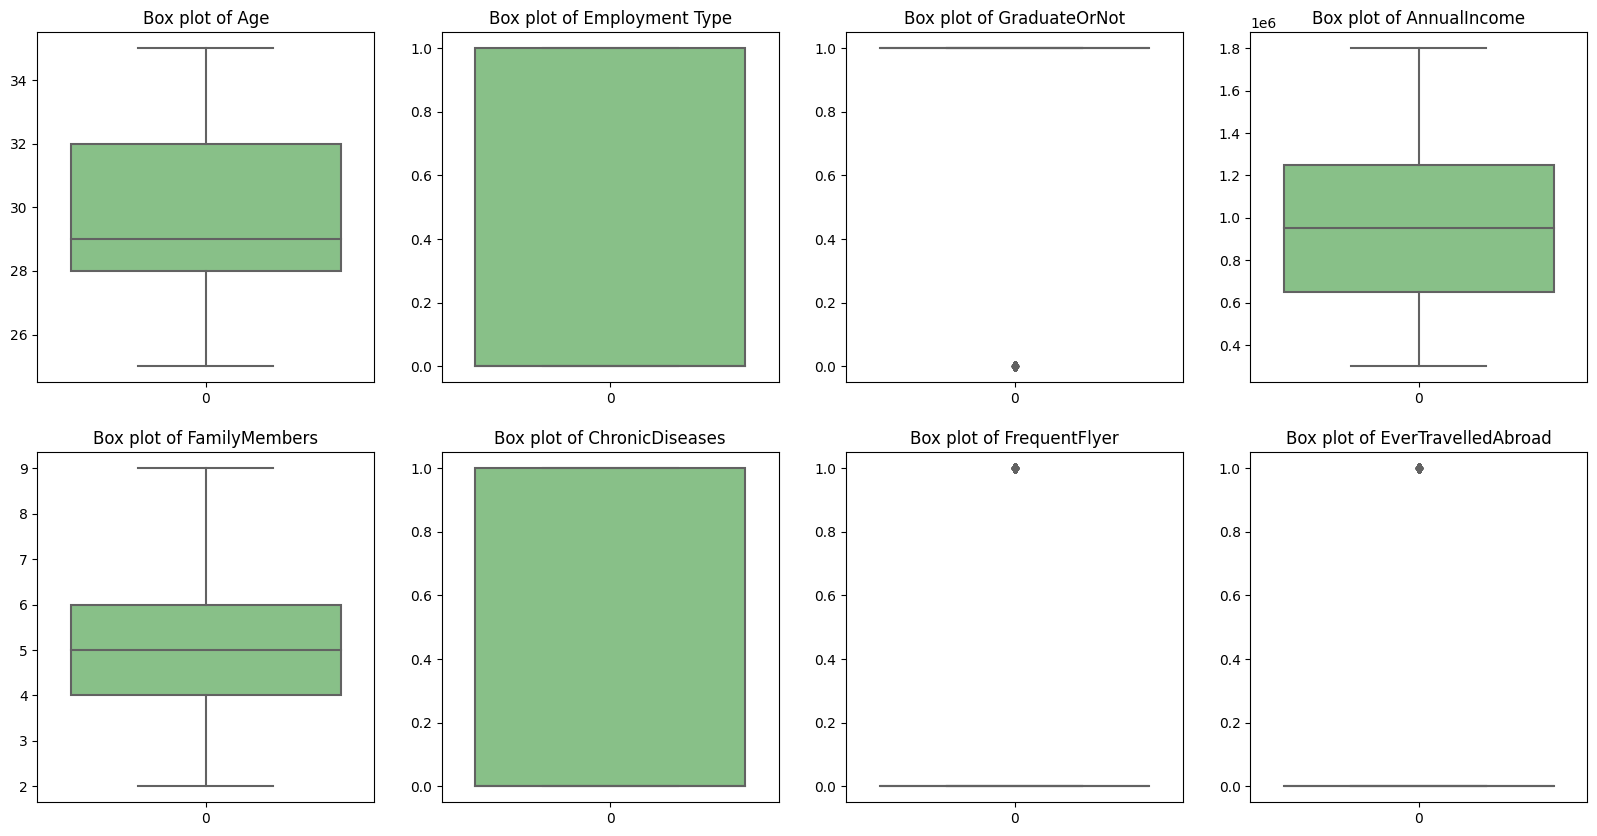

In [ ]:
cols = list(x.columns)
f, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title('Box plot of '+ cols[i])
  sns.boxplot(x[cols[i]], palette = 'Accent')
plt.show()

The plots above provide insights such as:
- Majority of the travellers are above the  median age of 29.
- The travellers' annual income seems to be equally distributed on both sides of the median between the 1st and 3rd quartile.
- The travellers' family sizes seem to be equally distributed on both sides of the median.
- The number of travellers with a degree is quite high.
- The number of travellers who are frequent flyers is low similar to those who have an experience travelling abroad.




- Scaling the features

In [ ]:
feature_to_scale = numerical
min_max_scaler = MinMaxScaler()

In [ ]:
x[feature_to_scale] = min_max_scaler.fit_transform(x[feature_to_scale])
x

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.6,1,1,0.066667,0.571429,1,0,0
1,0.6,0,1,0.633333,0.714286,0,0,0
2,0.9,0,1,0.133333,0.285714,1,0,0
3,0.3,0,1,0.266667,0.142857,1,0,0
4,0.3,0,1,0.266667,0.857143,1,1,0
...,...,...,...,...,...,...,...,...
674,0.2,1,1,0.366667,0.000000,0,0,0
676,0.4,0,1,0.600000,0.714286,1,0,0
677,0.2,0,0,0.100000,0.714286,0,0,0
680,0.4,0,1,0.533333,0.285714,1,0,1


Now that the entire dataset is in the range of 0-1, let's check the combined range

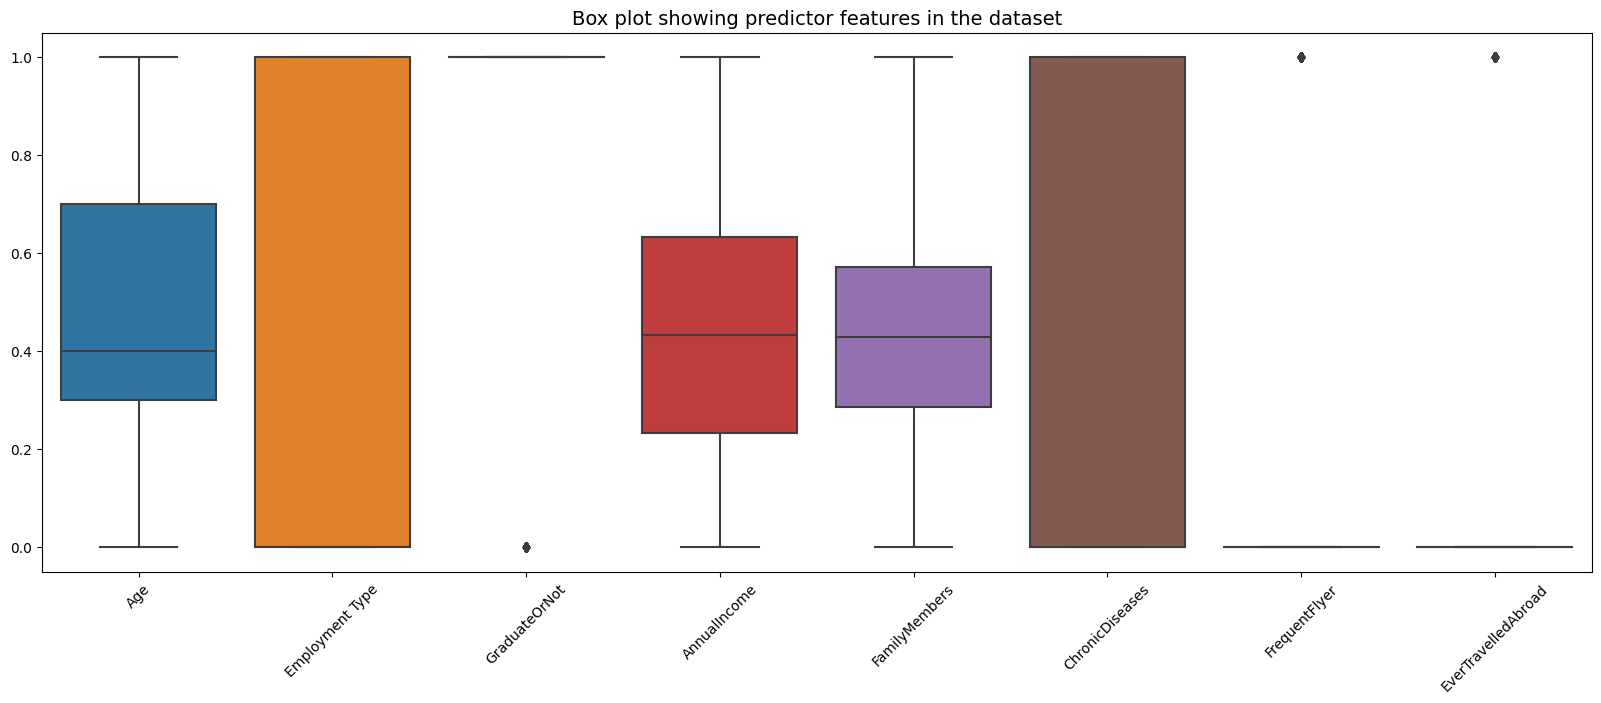

In [ ]:

figure = plt.figure(figsize=(20,7))
sns.boxplot(x)
plt.xticks(rotation = 45)
plt.title("Box plot showing predictor features in the dataset", size=14)
plt.show()


Performing a correlation to check for dependancy between features

In [ ]:
corrSpearman = x.corr(method="spearman")

### Spearman

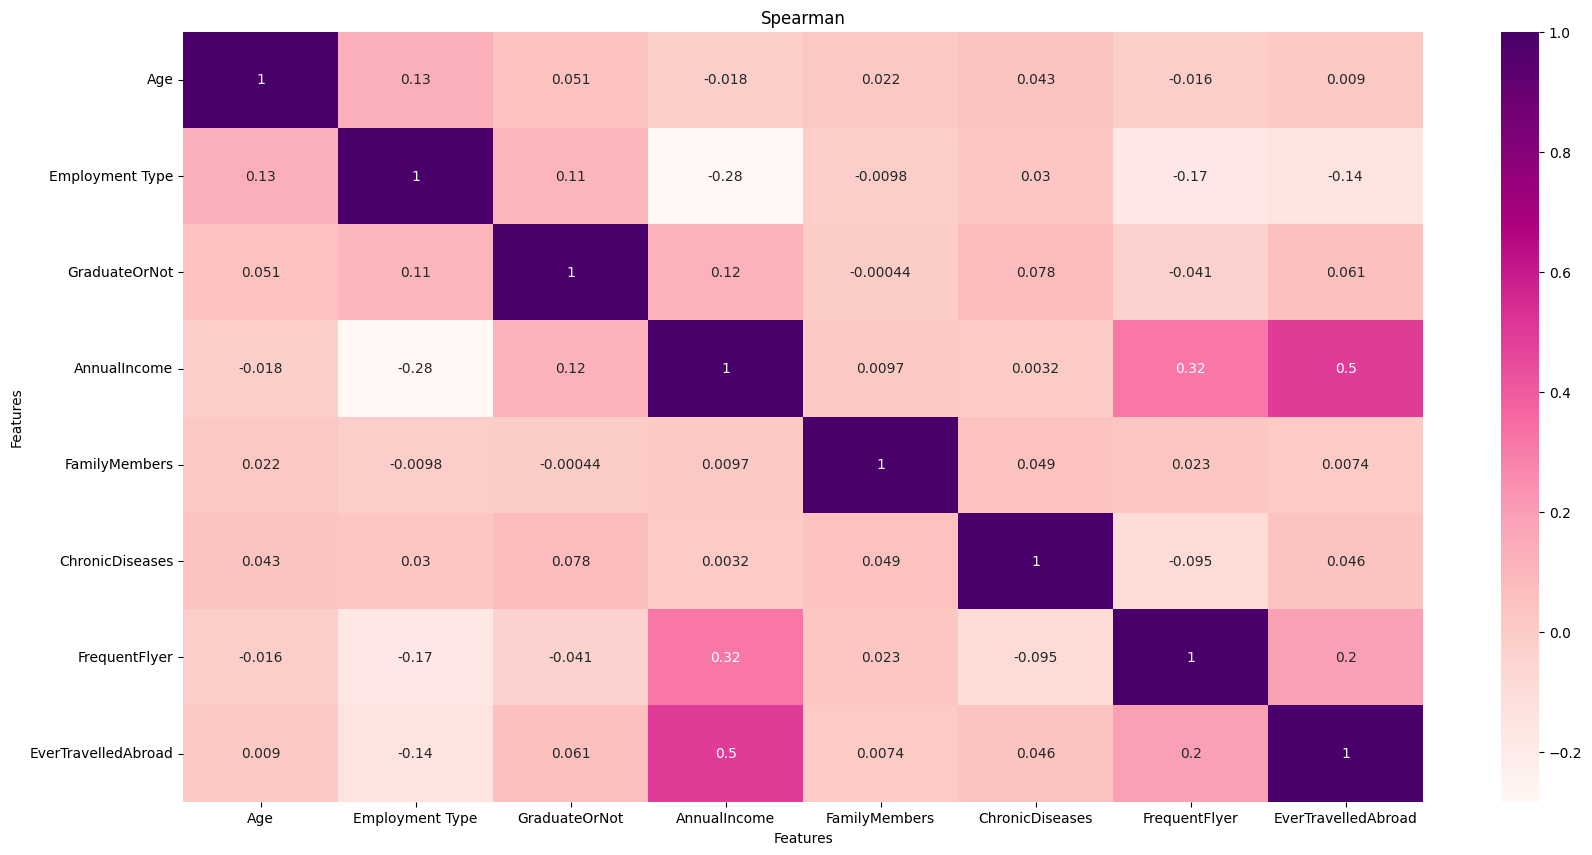

In [ ]:
figure = plt.figure(figsize=(20,10))
sns.heatmap(corrSpearman,annot=True,cmap='RdPu')
plt.title("Spearman")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

Insights:
- Annual Income and international travel history have a moderately positive correlation.
- Annual Income and travel frequency  have a weakly positive correlation.
- Most features have a rather weak correlation to other features.

Partitioning the train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

To check the distribution of train and test data

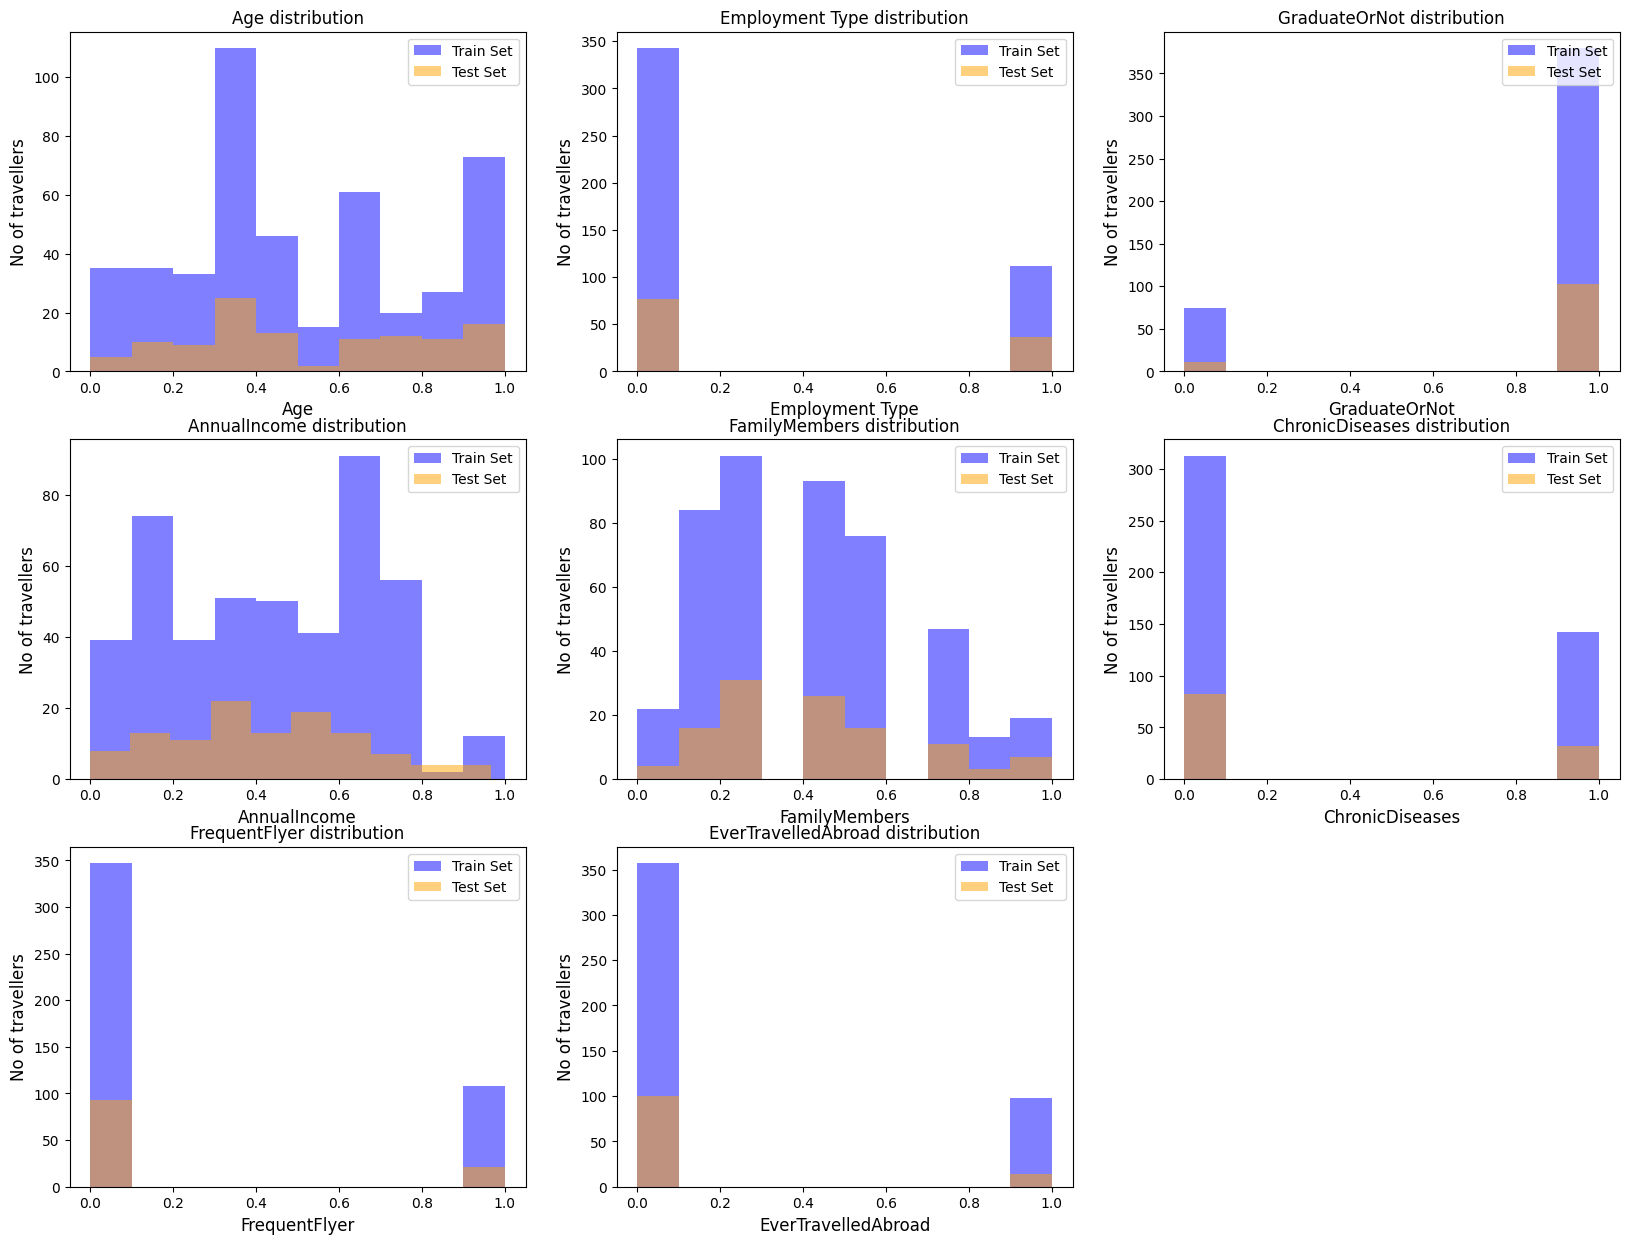

In [ ]:
X_test_plot = X_test
X_train_plot = X_train

plot_n= 0
plt.figure(figsize=(20,15))

for c in X_test_plot.columns[:]:
    plot_n += 1
    plt.subplot(3,3,plot_n)
    plt.hist(X_train_plot[c], bins=10, alpha=0.5, label="Train Set", color="blue")
    plt.hist(X_test_plot[c], bins=10, alpha=0.5, label="Test Set", color ="orange")
    plt.xlabel(c, size=12)
    plt.ylabel("No of travellers", size=12)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    
plt.show()

- ### Fitting Regression Models

1.A logistic regression model

Creating an instance and fitting the data

In [ ]:
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]                                   }

In [ ]:
trvl = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, cv=7)
trvl.fit(X_train, y_train)

# Prediction
y_pred = trvl.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)

To check the performance of the model

In [ ]:
log_loss1 = log_loss(y_test, trvl.predict(X_test))

To summarize the performance of the classification model by showing the counts of true positive, true negative, false positive, and false negative predictions. 

In [ ]:
confusion_matrix1 = confusion_matrix(y_test, trvl.predict(X_test))

To print out the coefficients, accuracy score and performance

In [ ]:
print("*************************")
print("Logistic Regression model accuracy (in %):", acc*100)
print("Performance:", log_loss1)
print(f'Confusion Matrix:\n {confusion_matrix1}')
print("*************************")

*************************
Logistic Regression model accuracy (in %): 73.68421052631578
Performance: 9.485171944504515
Confusion Matrix:
 [[72  7]
 [23 12]]
*************************


- #### Fitting a Tree Based Model

Visualizing the importance of features to the model

In [ ]:
Treemodel = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

* Arrange the features in descending order

<BarContainer object of 8 artists>

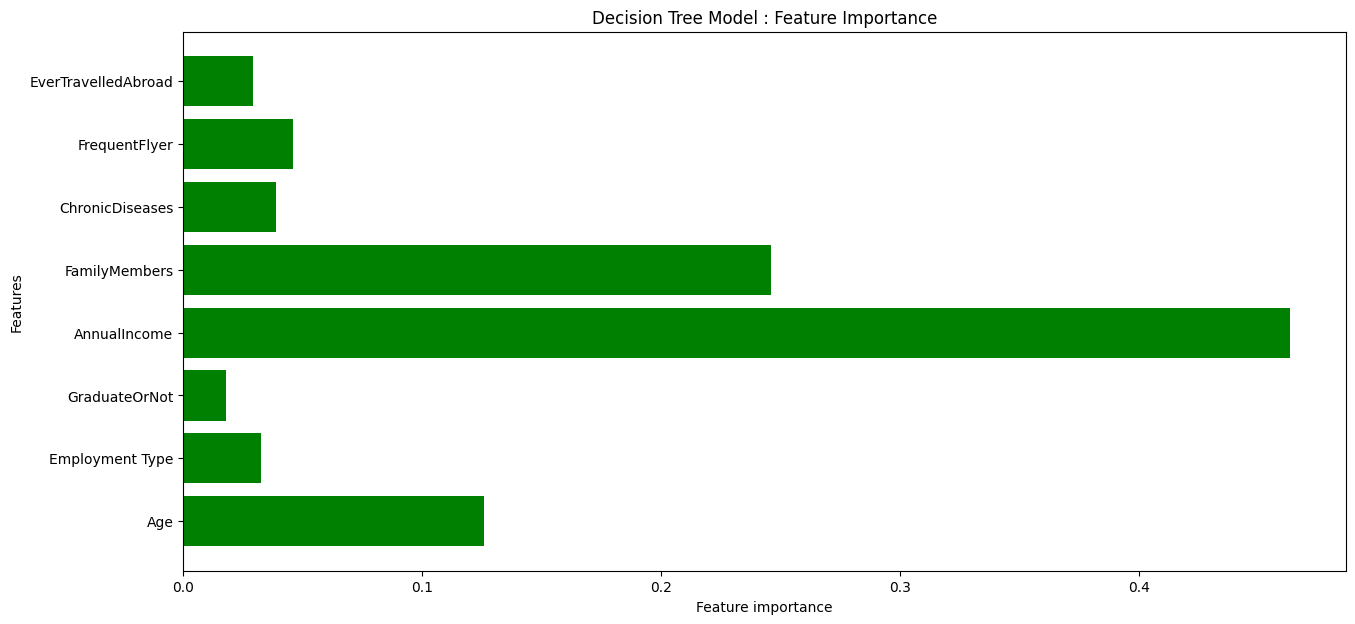

In [ ]:
plt.figure(figsize=(15,7))
importances = Treemodel.feature_importances_
features = list(X_train.columns)
plt.title("Decision Tree Model : Feature Importance")
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.barh(features,importances,color='g')

It is evidently clear that annual income is the most important feature for our model.Number of family members and age also significantly influence the model.

In [ ]:

cross_val_score(Treemodel, X_train, y_train, cv=10)

array([0.67391304, 0.67391304, 0.67391304, 0.67391304, 0.76086957,
       0.68888889, 0.68888889, 0.71111111, 0.66666667, 0.66666667])

Plotting the decision tree

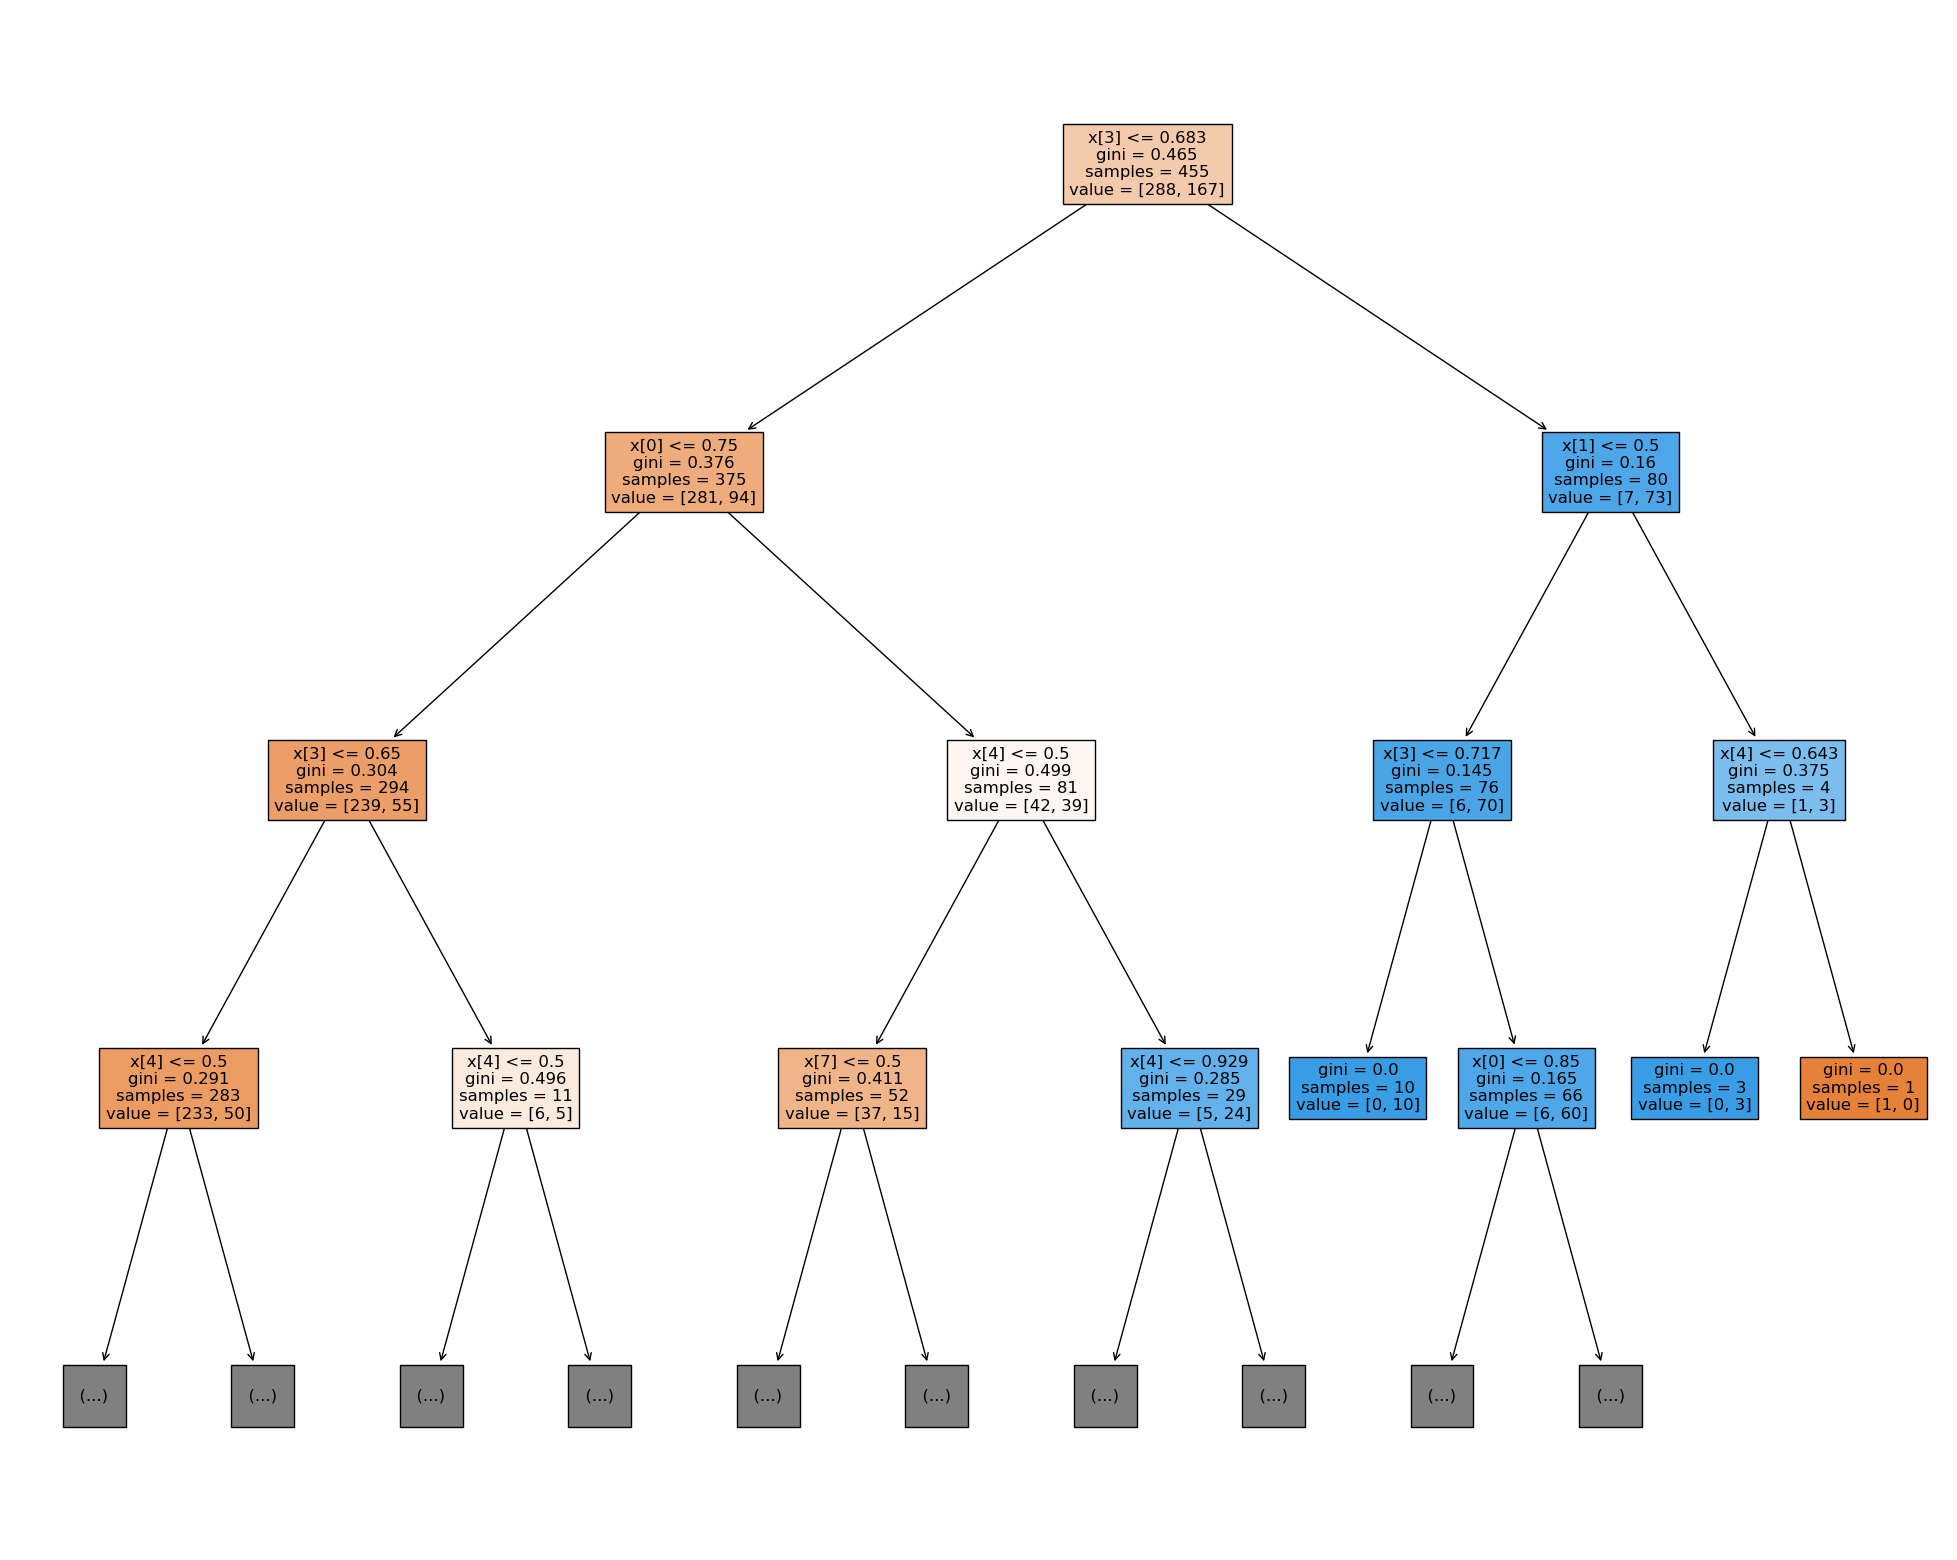

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Treemodel,max_depth=3, filled=True)

In [ ]:
#To calculate the accuracy score
acc2 =accuracy_score(y_test, Treemodel.predict(X_test))

#To calculate the certainity of the predicted labels(Model performance)
log_loss = log_loss(y_test, Treemodel.predict(X_test))

#Count values for distribution of targets
confusion_matrix =confusion_matrix(y_test, Treemodel.predict(X_test))

print("*******************")
print(f'Decision Tree Model accuracy (in %) is: {acc*100:.2f}')
print(f'Performance: {log_loss:.2f}')
print(f'Confusion Matrix:\n {confusion_matrix}')
print("*******************")

*******************
Decision Tree Model accuracy (in %) is: 73.68
Performance: 12.01
Confusion Matrix:
 [[59 20]
 [18 17]]
*******************


Moving to other models

In [ ]:
def training(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    acc *= 100
    acc = round(acc, 2)
    title = "{}: {}%".format(name, acc)
    print(title)
    return model

In [ ]:
rfr = RandomForestClassifier(max_depth=5,criterion='gini')
gnb = GaussianNB()
etc = ExtraTreesClassifier(max_depth=4)
dtc = DecisionTreeClassifier(max_depth=4)


models = [rfr, gnb, etc, dtc]
names = ['Random Forest', 'Naive Bayes', 'Extra Trees',
         'Decision Tree']

##### Model Valuations

In [ ]:
trained_models = []
for i, j in zip(models, names):
    trained_models += [training(i, j)]

Random Forest: 76.32%
Naive Bayes: 74.56%
Extra Trees: 77.19%
Decision Tree: 81.58%


### Creating a pickle file

In [ ]:
pickle_out = open("Tress_model.pkl","wb")
pickle.dump(Treemodel, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("Tress_model.pkl","rb")
classifier=pickle.load(pickle_in)

# To predict the behaviour of new travellers

Loading the dataset

In [ ]:
NewTravellers= pd.read_csv("C:\\Users\\JANUARIUS\\Desktop\\ML1\\Travel-Insurance-Prediction\\Travel Company New Clients.csv",sep=';')
NewTravellers

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,25,Private Sector/Self Employed,No,1150000,4,0,No,No
1,34,Private Sector/Self Employed,Yes,1500000,4,1,Yes,Yes
2,33,Private Sector/Self Employed,Yes,1500000,3,0,Yes,Yes
3,28,Private Sector/Self Employed,Yes,1150000,3,0,No,No
4,33,Government Sector,Yes,400000,5,1,No,No
...,...,...,...,...,...,...,...,...
1298,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes
1299,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes
1300,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No
1301,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes


Defining the variables

In [ ]:
categoricalss = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
numericalss = ['Age', 'AnnualIncome', 'FamilyMembers']

To check for missingness

In [ ]:
NewTravellers.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

Dropping duplicates

In [ ]:
NewTravellers=NewTravellers.drop_duplicates()
NewTravellers

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,25,Private Sector/Self Employed,No,1150000,4,0,No,No
1,34,Private Sector/Self Employed,Yes,1500000,4,1,Yes,Yes
2,33,Private Sector/Self Employed,Yes,1500000,3,0,Yes,Yes
3,28,Private Sector/Self Employed,Yes,1150000,3,0,No,No
4,33,Government Sector,Yes,400000,5,1,No,No
...,...,...,...,...,...,...,...,...
1291,26,Private Sector/Self Employed,Yes,1400000,9,0,No,Yes
1292,32,Government Sector,Yes,900000,6,0,No,No
1298,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes
1299,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes


Converting the features into binary

In [ ]:
NewTravellers['Employment Type'] = NewTravellers['Employment Type'].apply(convert_employmenttype_to_binary)

C:\Users\JANUARIUS\AppData\Local\Temp\ipykernel_13516\3911974398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewTravellers['Employment Type'] = NewTravellers['Employment Type'].apply(convert_employmenttype_to_binary)


In [ ]:
def convert_yesno_to_binary(NewTravellers):
    if NewTravellers == 'Yes':
        return 1
    elif NewTravellers == 'No':
        return 0
    else:
        return NewTravellers

In [ ]:
NewTravellers['GraduateOrNot'] = NewTravellers['GraduateOrNot'].apply(convert_yesno_to_binary)
NewTravellers['FrequentFlyer'] = NewTravellers['FrequentFlyer'].apply(convert_yesno_to_binary)
NewTravellers['EverTravelledAbroad'] = NewTravellers['EverTravelledAbroad'].apply(convert_yesno_to_binary)
NewTravellers['ChronicDiseases'] = NewTravellers['ChronicDiseases'].apply(convert_yesno_to_binary)

NewTravellers

C:\Users\JANUARIUS\AppData\Local\Temp\ipykernel_13516\1612499554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewTravellers['GraduateOrNot'] = NewTravellers['GraduateOrNot'].apply(convert_yesno_to_binary)
C:\Users\JANUARIUS\AppData\Local\Temp\ipykernel_13516\1612499554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewTravellers['FrequentFlyer'] = NewTravellers['FrequentFlyer'].apply(convert_yesno_to_binary)
C:\Users\JANUARIUS\AppData\Local\Temp\ipykernel_13516\1612499554.py:3: SettingWithCopyWa

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,25,0,0,1150000,4,0,0,0
1,34,0,1,1500000,4,1,1,1
2,33,0,1,1500000,3,0,1,1
3,28,0,1,1150000,3,0,0,0
4,33,1,1,400000,5,1,0,0
...,...,...,...,...,...,...,...,...
1291,26,0,1,1400000,9,0,0,1
1292,32,1,1,900000,6,0,0,0
1298,33,0,1,1500000,4,0,1,1
1299,28,0,1,1750000,5,1,0,1


In [ ]:
y_target= y_target.apply(convert_yesno_to_binary)

In [ ]:
feature_to_scale = numerical
min_max_scaler = MinMaxScaler()
NewTravellers[feature_to_scale] = min_max_scaler.fit_transform(NewTravellers[feature_to_scale])
NewTravellers

C:\Users\JANUARIUS\AppData\Local\Temp\ipykernel_13516\58478170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewTravellers[feature_to_scale] = min_max_scaler.fit_transform(NewTravellers[feature_to_scale])


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.0,0,0,0.566667,0.285714,0,0,0
1,0.9,0,1,0.800000,0.285714,1,1,1
2,0.8,0,1,0.800000,0.142857,0,1,1
3,0.3,0,1,0.566667,0.142857,0,0,0
4,0.8,1,1,0.066667,0.428571,1,0,0
...,...,...,...,...,...,...,...,...
1291,0.1,0,1,0.733333,1.000000,0,0,1
1292,0.7,1,1,0.400000,0.571429,0,0,0
1298,0.8,0,1,0.800000,0.285714,0,1,1
1299,0.3,0,1,0.966667,0.428571,1,0,1


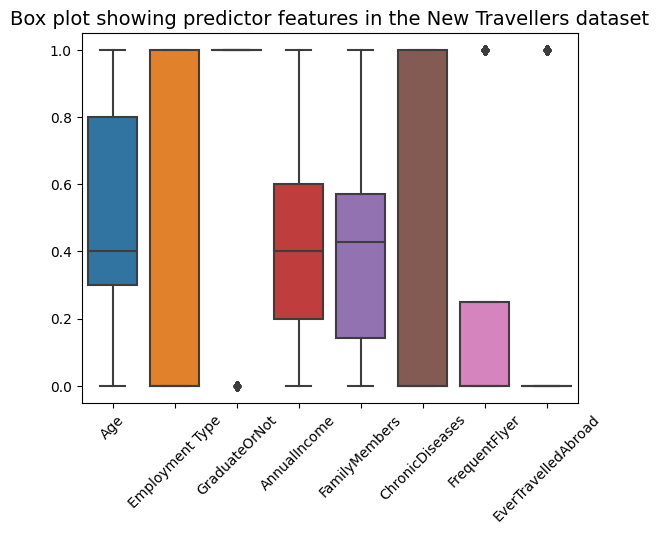

In [ ]:
sns.boxplot(NewTravellers)
plt.xticks(rotation = 45)
plt.title("Box plot showing predictor features in the New Travellers dataset", size=14)
plt.show()